# Machine Learning Introduction

In this notebook, we will build some basic machine learning functions.

# In Class Work

In [29]:
# import the necessary libraries
from collections import Counter
import math, random
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

C:\Users\SmarTech\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Data Splitting

First, let's develop some routines that split data up for us in cross-validation

In [2]:
def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

def train_test_split(x, y, test_pct):
    data = list(zip(x, y))                        # pair corresponding values
    train, test = split_data(data, 1 - test_pct)  # split the dataset of pairs
    x_train, y_train = list(zip(*train))          # magical un-zip trick
    x_test, y_test = list(zip(*test))
    return x_train, x_test, y_train, y_test

## Correctness Measures

Now, let's make some functions that let us measure how well our algorithms are working

In [21]:
def accuracy(tp, fp, fn, tn):
    """(TP+TN)/N"""
    return (tp+tn)/(tp+tn+fp+fn)

def precision(tp, fp, fn, tn):
    """TP/(TP+FP)"""
    return tp/(tp+fp)
def recall(tp, fp, fn, tn):
    """TP/(TP+FN)"""
    return tp/(tp+fn)
def f1_score(tp, fp, fn, tn):
    """Harmonic average of precision and recall"""
    p=tp/(tp+fp)
    r=tp/(tp+fn)
    return (2*p*r)/(p+r)

In [22]:
tp=70
fp=4390
tn=981070
fn=13930
print(accuracy(tp,fp,fn,tn))
print(precision(tp, fp, fn, tn))
print(recall(tp, fp, fn, tn))
print(f1_score(tp, fp, fn, tn))

0.9816701018550017
0.01569506726457399
0.005
0.007583965330444203


### Test your code

Try this out with some problems. Give the accuracy, precision, recall, and f1-scores for the following:
1. You have 100 objects: 50 of the positive class, and 50 of the negative class.
   - Correctly classifies 25 of the positive class, and 25 of the negative class.
   - Correctly classifies 10 of the positive class, and 40 of the negative class.
   - Correctly classifies 10 of the positive class, and 10 of the negative class.
   - Correctly classifies 40 of the positive class, and 10 of the negative class.
   - Correctly classifies 40 of the positive class, and 40 of the negative class.
2. You have 100 objects: 90 of the positive class, and 10 of the negative class.
   - Correctly classifies 45 of the positive class, and 5 of the negative class.
   - Correctly classifies 10 of the positive class, and 9 of the negative class.
   - Correctly classifies 10 of the positive class, and 1 of the negative class.
   - Correctly classifies 80 of the positive class, and 1 of the negative class.
   - Correctly classifies 10 of the positive class, and 9 of the negative class.
3. You have 100 objects: 10 of the positive class, and 90 of the negative class. Repeat 2., switching around the numbers for positive and negative class for each part.


In [82]:
acc=[]
rec=[]
pre=[]
f1=[]

In [83]:
def performance_measures(tp,fp,fn,tn):
    acc.append(accuracy(tp,fp,fn,tn))
    pre.append(precision(tp,fp,fn,tn))
    rec.append(recall(tp,fp,fn,tn))
    f1.append(f1_score(tp,fp,fn,tn))

In [84]:
performance_measures(25,25,25,25)
performance_measures(10,40,10,40)
performance_measures(10,40,40,10)
performance_measures(40,10,40,10)
performance_measures(40,10,10,40)
performance_measures(45,45,5,5)
performance_measures(10,80,1,9)
performance_measures(10,80,9,1)
performance_measures(80,10,9,1)
performance_measures(80,10,1,9)
performance_measures(5,5,45,45)
performance_measures(9,1,80,10)
performance_measures(1,9,80,10)
performance_measures(1,9,10,80)
performance_measures(9,1,10,80)

In [85]:
df=pd.DataFrame({'Accuracy':acc,'Precision':pre,'Recall':rec,'F1_Score':f1},index=['Q' + str(x) for x in range(1,len(acc)+1)])

In [86]:
df

,Accuracy,F1_Score,Precision,Recall
Q1,0.50,0.500000,0.500000,0.500000
Q2,0.50,0.285714,0.200000,0.500000
Q3,0.20,0.200000,0.200000,0.200000
Q4,0.50,0.615385,0.800000,0.500000
Q5,0.80,0.800000,0.800000,0.800000
Q6,0.50,0.642857,0.500000,0.900000
Q7,0.19,0.198020,0.111111,0.909091
Q8,0.11,0.183486,0.111111,0.526316
Q9,0.81,0.893855,0.888889,0.898876
Q10,0.89,0.935673,0.888889,0.987654


## Scikit-learn and Iris

Let's now play with some data, called the Iris data set. We will also begin to learn how to use the scikit-learn library.

([], <a list of 0 Text yticklabel objects>)

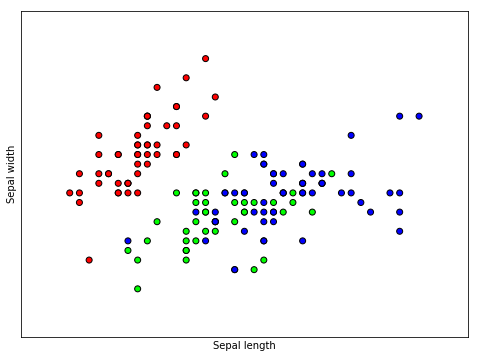

In [87]:
# import the iris dataset
iris = datasets.load_iris()
X = iris.data[:,:2] # we will only use the first two features
y = iris.target

# plot the iris dataset where the color of each class is different
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

What do you notice about the three classes?

The iris data is four-dimensional. Let's use PCA to plot the 4-dimensional features in 2 and 3 dimensions.

### Apart from Red Class, other 2 classes are merged in each other. It is difficult to classify them. 

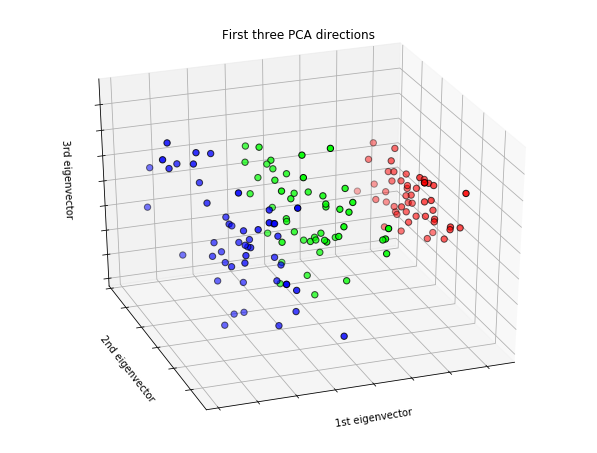

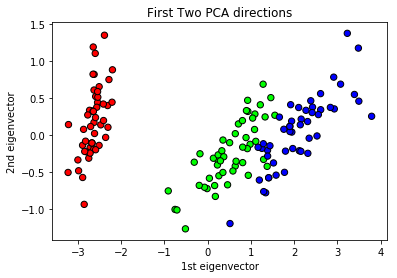

In [91]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=cmap_bold, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

ax = plt.subplot(111)
fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=cmap_bold, edgecolor='k', s=40)
ax.set_title("First Two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")

plt.show()
# now make a plot of the first two PCA components

## Nearest-neighbor classification

One of the most basic classifiers is the k-nearest neighbor classifier. It simply classifies data by finding the nearest objects in the training set and looking at their labels.

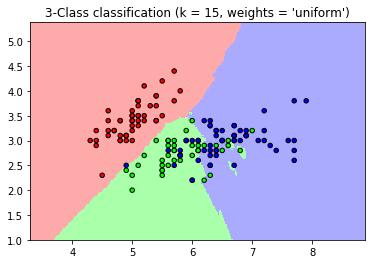

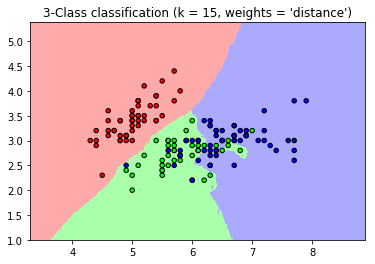

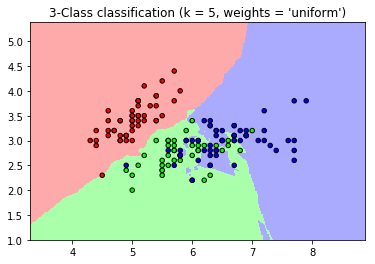

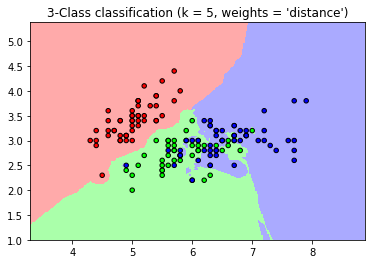

In [95]:
h = .02  # step size in the mesh
n_neighbors = 15 # number of neighbors to use in classification

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

h = .02  # step size in the mesh
n_neighbors = 5 # number of neighbors to use in classification

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Bias and Variance in Nearest Neighbor classifiers

Change n_neighbors in the above classifier and observe how the classification surfaces change. How does this relate to bias and variance?

Next, use the split routine to separate the iris dataset in 80% training data and 20% testing data. Then use the nearest neighbor classifier to look at the four performance measures vs. different n_neighbor values. Try this with both the _uniform_ and _distance_ weighted classifiers.

### If K is increased then we see proper paterns and regions start to classify out. In that case variance is high and Bias is low.


### But, if K is decreased then regions are difficult to seperate because data is merged in each other. In that case, Variance is low and Bias is High.

## NN Classifier Project

1) Plot accuracy, precision, recall, and f1-score vs. the number of neighbors with a 20% test split on the iris data using all 4 features. Use number of neighbors from 1 to 50 with both _uniform_ and _distance_ weighted classifiers. Comment on the results. Which classifier would you choose if you could only choose one? (That is, what value of n_neighbors would you choose and what kind of weight?)

2) Use PCA to reduce the iris data set to 2 components, then repeat the experiment you did in part 1). Plot the classification regions and the testing data (you can directly modify the PCA chunk of code provided above) to show the best classifier and the worst classifier. Comment on the results. You should comment on the bias and variance of the best and worst classifiers.

# Question 2



In [236]:
# importing sklearn libraries

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [251]:
# Use all of the iris data
X = iris.data
y = iris.target

# Split the data into training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 0.2)

In [305]:
# Defininig a function which trains the data and make predictions based on test data. It also computational performance measures
# and plot them against K values.

def KNN(weight,avg):
    recall=[]
    precision=[]
    accuracy=[]
    f1=[]
    plt.figure(figsize=(14,10))
    for n_neighbors in range(1,51):
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weight)
        clf=clf.fit(Xtrain, ytrain)
        ypred=clf.predict(Xtest)
        a=accuracy_score(ytest, ypred)
        p=precision_score(ytest, ypred,average=avg)
        r=recall_score(ytest, ypred,average=avg)
        f=f1_score(ytest, ypred,average=avg)
        recall.append(r)
        precision.append(p)
        accuracy.append(a)
        f1.append(f)
        
    k=range(1,51)
    
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    plt.plot(k,recall,label='recall')
    plt.plot(k,precision,label='precision')
    plt.plot(k,accuracy,label='accuracy')
    plt.plot(k,f1,label='f1 Score')
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=5, borderaxespad=0.,fontsize='15')
    plt.title('Performance measures VS different values of K \n using weights = ' + weight,fontsize='24')
    plt.show()
    df=pd.DataFrame({'Accuracy':accuracy},index=range(1,len(k)+1))
    df=df.sort_values(by='Accuracy',ascending=False)
    display(df.head(n=10))


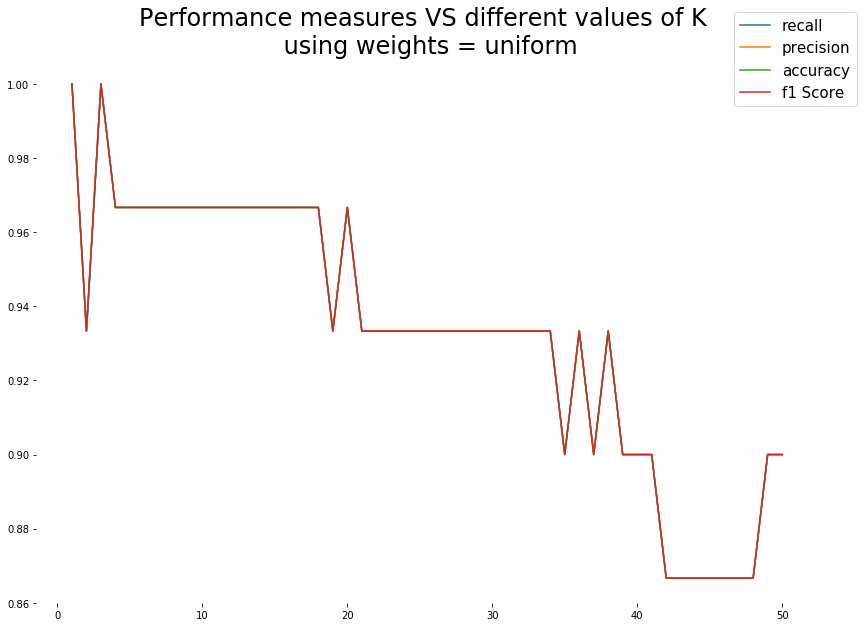

,Accuracy
1,1.000000
3,1.000000
11,0.966667
20,0.966667
18,0.966667
17,0.966667
16,0.966667
15,0.966667
13,0.966667
12,0.966667


In [306]:
a=KNN('uniform','micro')

### As we can see from the Table above that several values of 'K' have same accuracy. So, picking a value between these K's. In this case, i am using K=3 for best results.

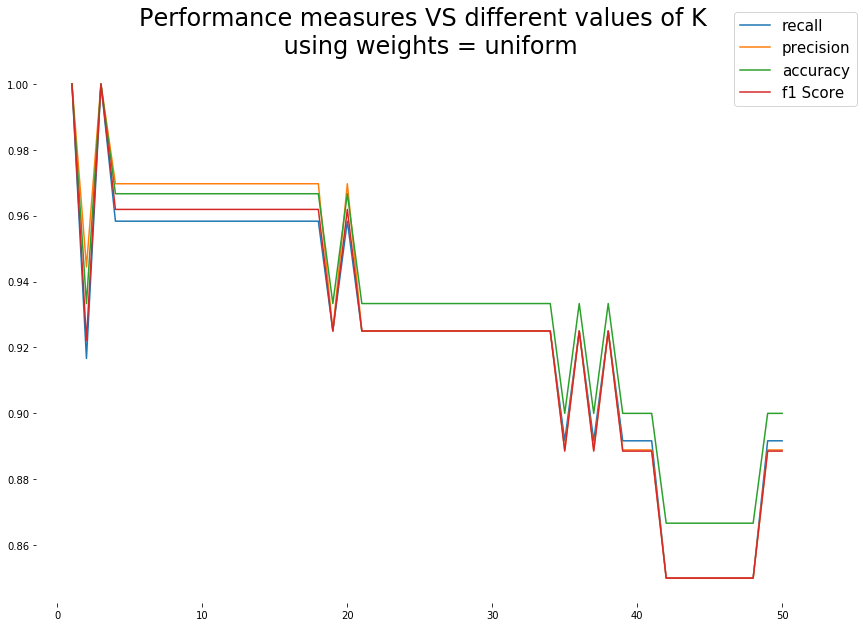

,Accuracy
1,1.000000
3,1.000000
11,0.966667
20,0.966667
18,0.966667
17,0.966667
16,0.966667
15,0.966667
13,0.966667
12,0.966667


In [307]:
a=KNN('uniform','macro')

### As we can see from the table above that several values of 'K' have same accuracy. So, picking a value between these K's. In this case, i am using K=3 for best results.

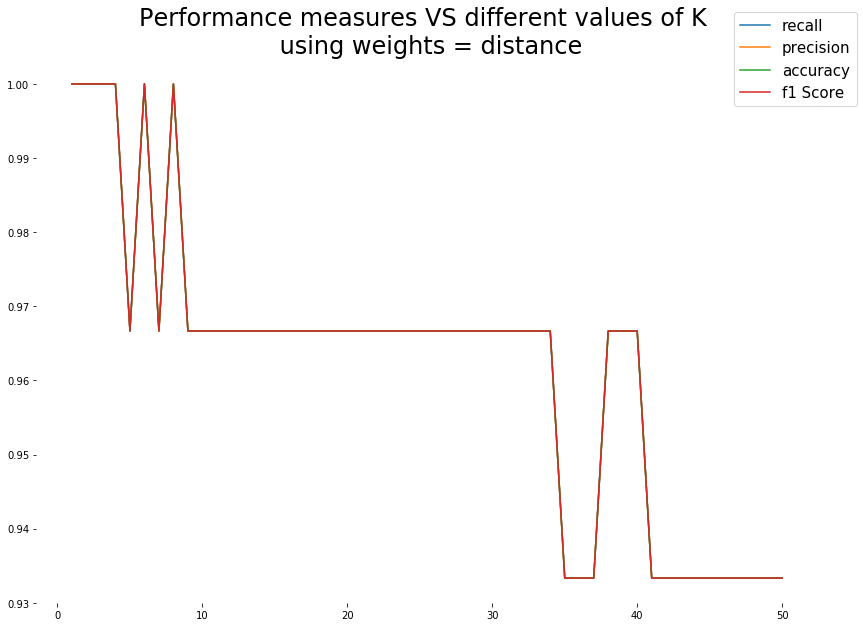

,Accuracy
1,1.000000
3,1.000000
4,1.000000
6,1.000000
8,1.000000
2,1.000000
30,0.966667
24,0.966667
25,0.966667
27,0.966667


In [308]:
a=KNN('distance','micro')

### As we can see from the table above that several values of 'K' have same accuracy. So, picking a value between these K's. In this case, i am using K=6 for best results.

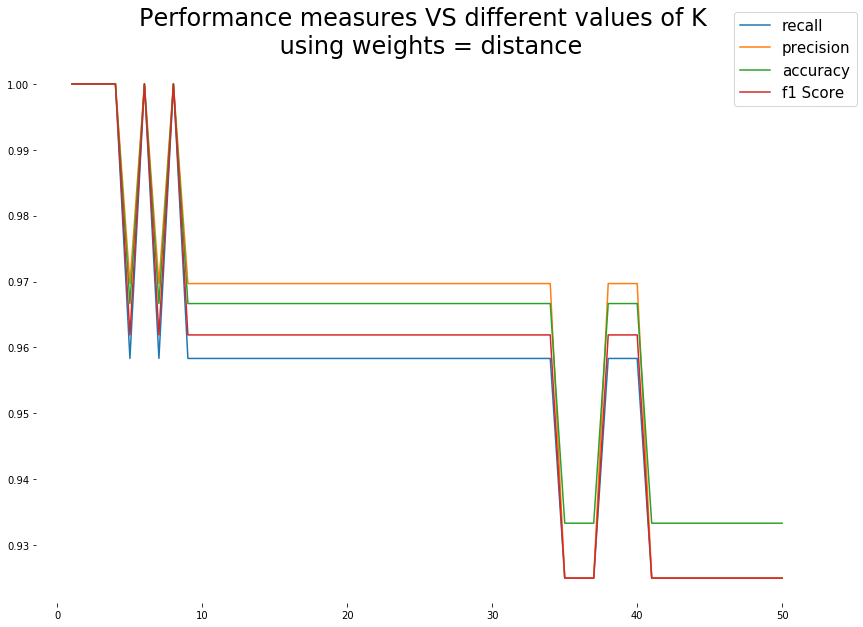

,Accuracy
1,1.000000
3,1.000000
4,1.000000
6,1.000000
8,1.000000
2,1.000000
30,0.966667
24,0.966667
25,0.966667
27,0.966667


In [309]:
a=KNN('distance','macro')

### As we can see from the table above that several values of 'K' have same accuracy. So, picking a value between these K's. In this case, i am using K=6 for best results.

## Conclusion:- As the data is small so almost each classifiers's accuracy is approximately same. But, if i have to choose between these, specifically value of K and weight, I would go with K=3 and weight='Uniform'.

# Question 3:-

In [310]:
# loading Iris dataset

iris = datasets.load_iris()

# reducing data to 2 components using PCA and performing test train split on reduced feature data and response data.
X_reduced = PCA(n_components=2).fit_transform(iris.data)
y=iris.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, 0.2)

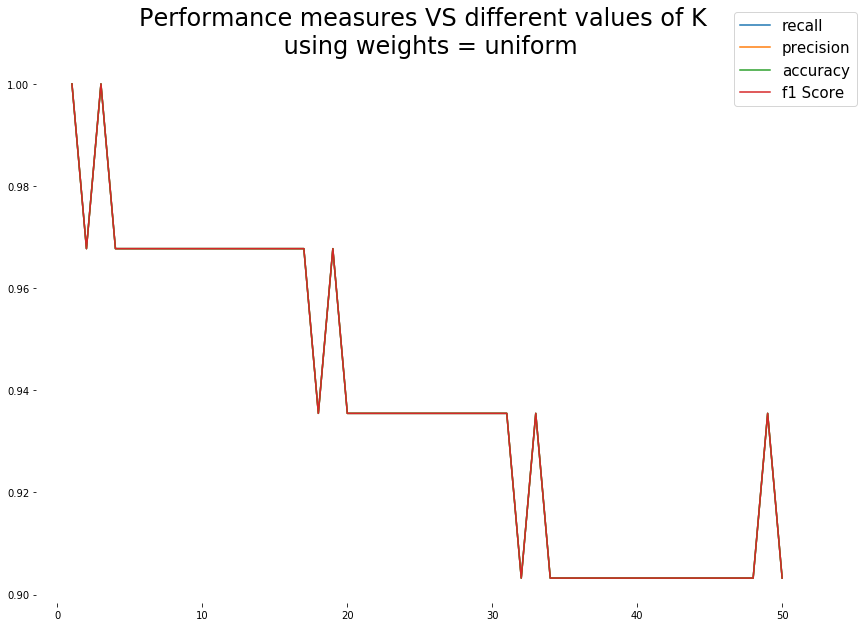

,Accuracy
1,1.000000
3,1.000000
11,0.967742
19,0.967742
17,0.967742
16,0.967742
15,0.967742
14,0.967742
2,0.967742
12,0.967742


In [311]:
a=KNN('uniform','micro')

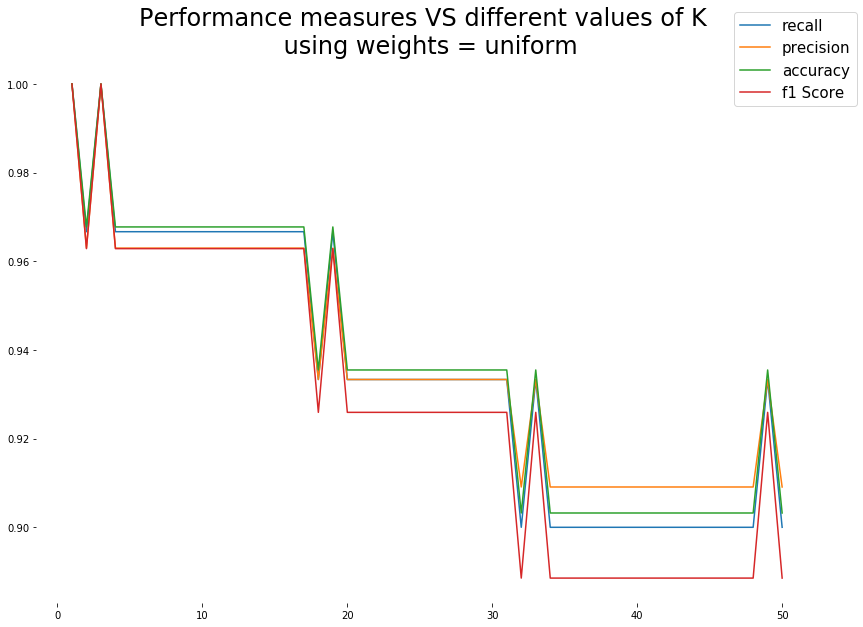

,Accuracy
1,1.000000
3,1.000000
11,0.967742
19,0.967742
17,0.967742
16,0.967742
15,0.967742
14,0.967742
2,0.967742
12,0.967742


In [312]:
a=KNN('uniform','macro')


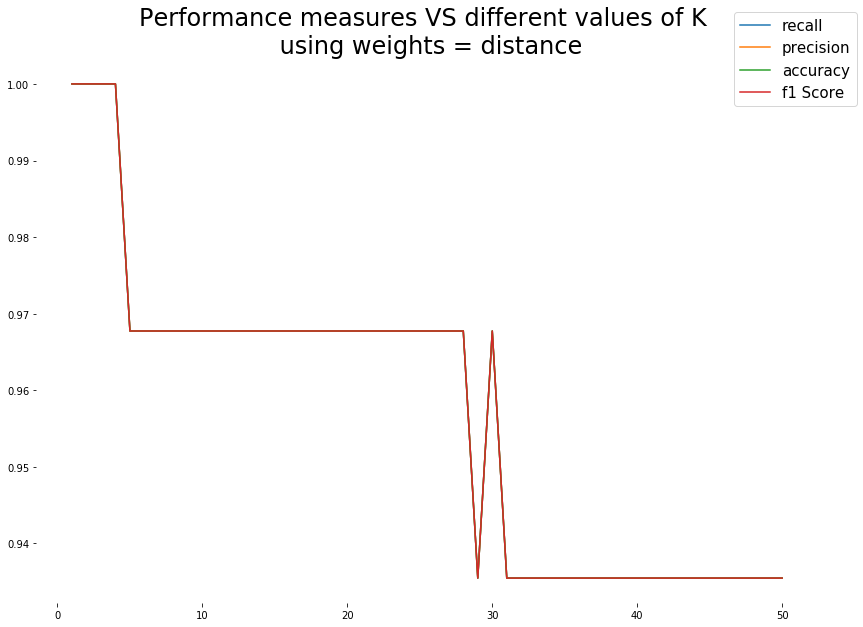

,Accuracy
1,1.000000
3,1.000000
4,1.000000
2,1.000000
17,0.967742
30,0.967742
28,0.967742
27,0.967742
25,0.967742
24,0.967742


In [313]:
a=KNN('distance','micro')


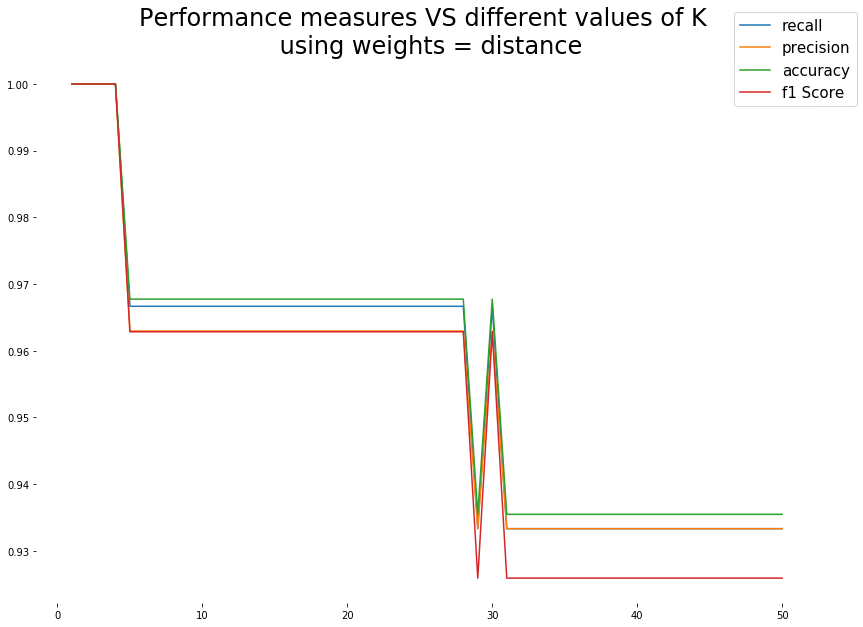

,Accuracy
1,1.000000
3,1.000000
4,1.000000
2,1.000000
17,0.967742
30,0.967742
28,0.967742
27,0.967742
25,0.967742
24,0.967742


In [314]:
a=KNN('distance','macro')


In [315]:
X_test=[]
for i in Xtest:
    X_test.append(i)
a=np.array(X_test)

# Best Classifier

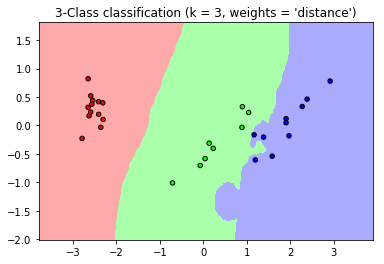

In [323]:
h = .02  # step size in the mesh
n_neighbors = 3 # number of neighbors to use in classification


# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_reduced,y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = a[:, 0].min() - 1, a[:, 0].max() + 1
y_min, y_max = a[:, 1].min() - 1, a[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(a[:, 0], a[:, 1], c=ytest, cmap=cmap_bold,
                edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

### As the data is not that large, so accuracies are approximately same for different K values. For best classifier, although value of K is small but Bias is small and variance is large.

# Worst Classifier

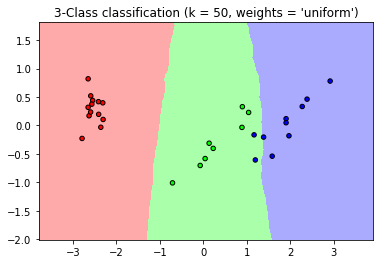

In [322]:
h = .02  # step size in the mesh
n_neighbors = 50 # number of neighbors to use in classification


# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X_reduced, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = a[:, 0].min() - 1, a[:, 0].max() + 1
y_min, y_max = a[:, 1].min() - 1, a[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(a[:, 0], a[:, 1], c=ytest, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'uniform'))

plt.show()

### As the data is not that large, so accuracies are approximately same for different K values. For worst classifier, Value of K is large so it can be seen that Variance is High and Bias is Low.